In [ ]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid

In [ ]:
Task1 = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/O4e%20-%20Task%201.csv')
Task2 = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/O4e%20-%20Task%202.csv')
d_G = 40 #mm, light source correction
d_B = 30 #mm, eye_piece correction
d_L = 272 #mm, distance between lenses

In [ ]:
Task1

,Object height (mm),Image height (mm),Middle point distance (mm),Total length (mm),Shift (mm),Arbeitsplatz III,Magnification (mm),Distance between lenses,d1,d2
0,1.0,2.96,333,623.0,50.0,NaN,2.960000,27.1,14.0,13.2
1,1.0,3.67,320,748.5,NaN,NaN,3.670000,NaN,NaN,NaN
2,1.0,4.43,310,903.0,NaN,NaN,4.430000,NaN,NaN,NaN
3,1.0,5.41,300,1123.0,NaN,NaN,5.410000,NaN,NaN,NaN
4,0.7,5.00,290,1530.5,NaN,NaN,7.142857,NaN,NaN,NaN
5,1.0,2.68,340,568.0,NaN,NaN,2.680000,NaN,NaN,NaN
6,1.0,2.41,345,541.0,NaN,NaN,2.410000,NaN,NaN,NaN
7,1.0,2.24,339,580.0,NaN,NaN,2.240000,NaN,NaN,NaN
8,1.0,3.27,327,676.0,NaN,NaN,3.270000,NaN,NaN,NaN


In [ ]:
gp_data = np.array(Task1['Middle point distance (mm)']) - d_G
bp_data = np.array(Task1['Total length (mm)']) - d_B - gp_data
M = np.array(Task1['Magnification (mm)']) #Magnification
gp_data = np.delete(gp_data,7)
bp_data = np.delete(bp_data,7)
M = np.delete(M,7)
S = 1 + 1/M
N = 1 + M
gp_data, S, N

(array([293, 280, 270, 260, 250, 300, 305, 287]),
 array([1.33783784, 1.27247956, 1.22573363, 1.18484288, 1.14      ,
        1.37313433, 1.41493776, 1.3058104 ]),
 array([3.96      , 4.67      , 5.43      , 6.41      , 8.14285714,
        3.68      , 3.41      , 4.27      ]))

In [ ]:
def gp(S, fsys, h):
  return fsys*S + h
def bp(N, fsys, hp):
  return fsys*N + hp

In [ ]:
def tot(M, fsys, h, hp):
  return fsys*(1+1/M) + h - (fsys*(1+M) + hp)


In [ ]:
popt1, pcov1 = curve_fit(gp, S, gp_data, p0 = [222,110])
popt2, pcov2 = curve_fit(bp, N, bp_data, p0 = [200,100])

Ns = np.linspace(2.410000,7.142857, 100)+1
Ss = np.linspace(1.14,1.41493776, 100)
fsys = (popt1[0]+popt2[0])/2
fsys, popt1[1], popt2[1], np.sqrt(pcov1[0][0]),np.sqrt(pcov2[0][0]),np.sqrt(pcov1[1][1]),np.sqrt(pcov2[1][1]),popt2[0],

(213.7372450513185,
 18.08954161323632,
 -584.0655632364488,
 6.776161019022986,
 4.674715212458336,
 8.706634920145747,
 24.390022453446395,
 222.6642062210091)

In [ ]:
(np.sqrt(pcov1[0][0])+np.sqrt(pcov2[0][0]))/2

5.725438115740661

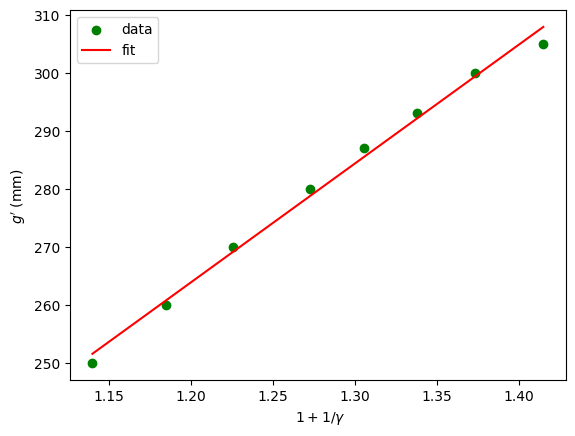

In [ ]:
plt.scatter(S,gp_data, c = 'g', label = 'data')
plt.plot(Ss, gp(Ss, popt1[0],popt1[1]), c = 'r', label = 'fit')
plt.xlabel(' $1+1/\gamma$')
plt.ylabel('$g^{\prime}$ (mm)')
plt.legend()
plt.savefig('1.png',dpi = 500)

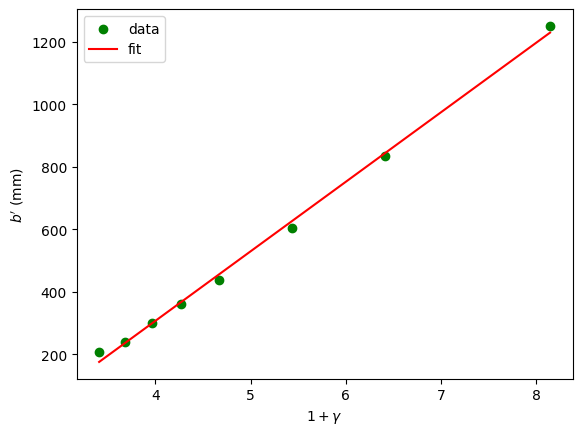

In [ ]:
plt.scatter(N,bp_data, c = 'g', label = 'data')
plt.plot(Ns, bp(Ns, popt2[0],popt2[1]), c = 'r', label = 'fit')
plt.xlabel('$1+\gamma$')
plt.ylabel('$b^{\prime}$ (mm)')
plt.legend()
plt.savefig('2.png',dpi = 500)

In [ ]:
Task2.head()

,d (L1),x1 (L1),x2 (L1),f1,d (L2),x1 (L2),x2 (L2),f2,f_sys
0,600,198,488,114.958333,1400,586,912,331.022143,90.846330
1,800,190,699,119.037188,1550,529,1102,334.543710,93.376145
2,500,213,377,111.552000,1848,488,1437,340.165449,89.365466


In [ ]:
dL1 = np.array(Task2['d (L1)']) - d_G
dL2 = np.array(Task2['d (L2)']) - d_G
x1L1 = np.array(Task2['x1 (L1)']) - d_G
x2L1 = np.array(Task2['x2 (L1)']) - d_G
x1L2 = np.array(Task2['x1 (L2)']) - d_G
x2L2 = np.array(Task2['x2 (L2)']) - d_G

In [ ]:
F1 = (dL1**2 - (x2L1-x1L1)**2)/(4*dL1)
F2 = (dL2**2 - (x2L2-x1L2)**2)/(4*dL2)
F1_avg = np.average(F1)
F2_avg = np.average(F2)


notFsys = 1/F1_avg + 1/F2_avg - d_L/(F1_avg*F2_avg)
Fsys = 1/notFsys
Fsys,F1_avg, F2_avg

(215.2030826132404, 102.53798422687153, 323.691619698999)